In [34]:
import numpy as np
import os
import pandas as pd

## Load Dataset: Beijing PM2.5

In [35]:
dataset_root = "../datasets/"
csvfile = os.path.join(dataset_root, "beijing_pm2.5", "PRSA_data_2010.1.1-2014.12.31.csv")
fields = ['year','month','day','DEWP','TEMP','PRES','Is','Ir'] # Specific columns to use.
df = pd.read_csv(csvfile, usecols=fields)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   month   43824 non-null  int64  
 2   day     43824 non-null  int64  
 3   DEWP    43824 non-null  int64  
 4   TEMP    43824 non-null  float64
 5   PRES    43824 non-null  float64
 6   Is      43824 non-null  int64  
 7   Ir      43824 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.7 MB


## Feature Definitions

List of plants to grow, with scores that rate their performance in a given interval of time. Scores should be floating-point numbers within a range (possibly from `[0,10]`) for each plant. The score matrix should have columns that correspond to each plant, and rows that correspond to each time interval.

For example:
```python
features = ['tomato', 'sunflower', 'cucumber']
scores = [[3, 7, 10], [2, 1, 5], [7, 9, 11]]
```

**Note**: The scores should eventually be normalized between `[0,1]` to accommodate different input score ranges.

In [36]:
# Add feature scores to the dataset.
# These scores should be normalized between [0,1].
features = ['tomato', 'sunflower', 'cucumber']
df = df.assign(**{feat:np.random.uniform(0.0, 1.0, size=df.shape[0]) for feat in features})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       43824 non-null  int64  
 1   month      43824 non-null  int64  
 2   day        43824 non-null  int64  
 3   DEWP       43824 non-null  int64  
 4   TEMP       43824 non-null  float64
 5   PRES       43824 non-null  float64
 6   Is         43824 non-null  int64  
 7   Ir         43824 non-null  int64  
 8   tomato     43824 non-null  float64
 9   sunflower  43824 non-null  float64
 10  cucumber   43824 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 3.7 MB


In [37]:
# Ensure rows are in time-sorted ascending order.
df = df.sort_values(['year','month','day'], ascending=[True,True,True])

## Data Visualization

In [38]:
import matplotlib.pyplot as plt

Text(0.5, 0, '(Year, Month)')

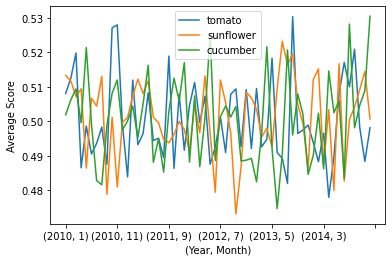

In [39]:
# Visualize average plant scores per month.
df.groupby(['year', 'month']).mean()[features].plot()
plt.ylabel('Average Score')
plt.xlabel('(Year, Month)')